In [14]:
 # need notebook backend for interaction
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# file-handling stuff for user, options abound! I like Tables and Pandas DataFrames
import pandas as pd
from astropy.table import Table
from astropy import units as u
from glob import glob
from scipy.optimize import curve_fit
from astropy.time import Time

from astropy.nddata import CCDData

# import kosmos... if we do it right this should be the only other thing to import someday!
import sys  
sys.path.append('/Users/james/Dropbox/research_projects/kosmos/')

import kosmos
kosmos.__version__

'0.1'

In [67]:
bdir = '/Users/james/Documents/Q2UW04/UT220604/'
files = glob(bdir+'kosmos_bias*')
len(files)

44

In [68]:
etime = np.zeros(len(files))
b_med = np.zeros(len(files))
b_avg = np.zeros(len(files))
temp =  np.zeros(len(files))

for k in range(len(files)):
    img = CCDData.read(files[k], unit=u.adu)
    etime[k] = Time(img.header['DATE-OBS']).mjd

    b_med[k] = np.nanmedian(img.data)
    b_avg[k] = np.nanmean(img.data)
    temp[k] = img.header['CCDTEMP']


<IPython.core.display.Javascript object>


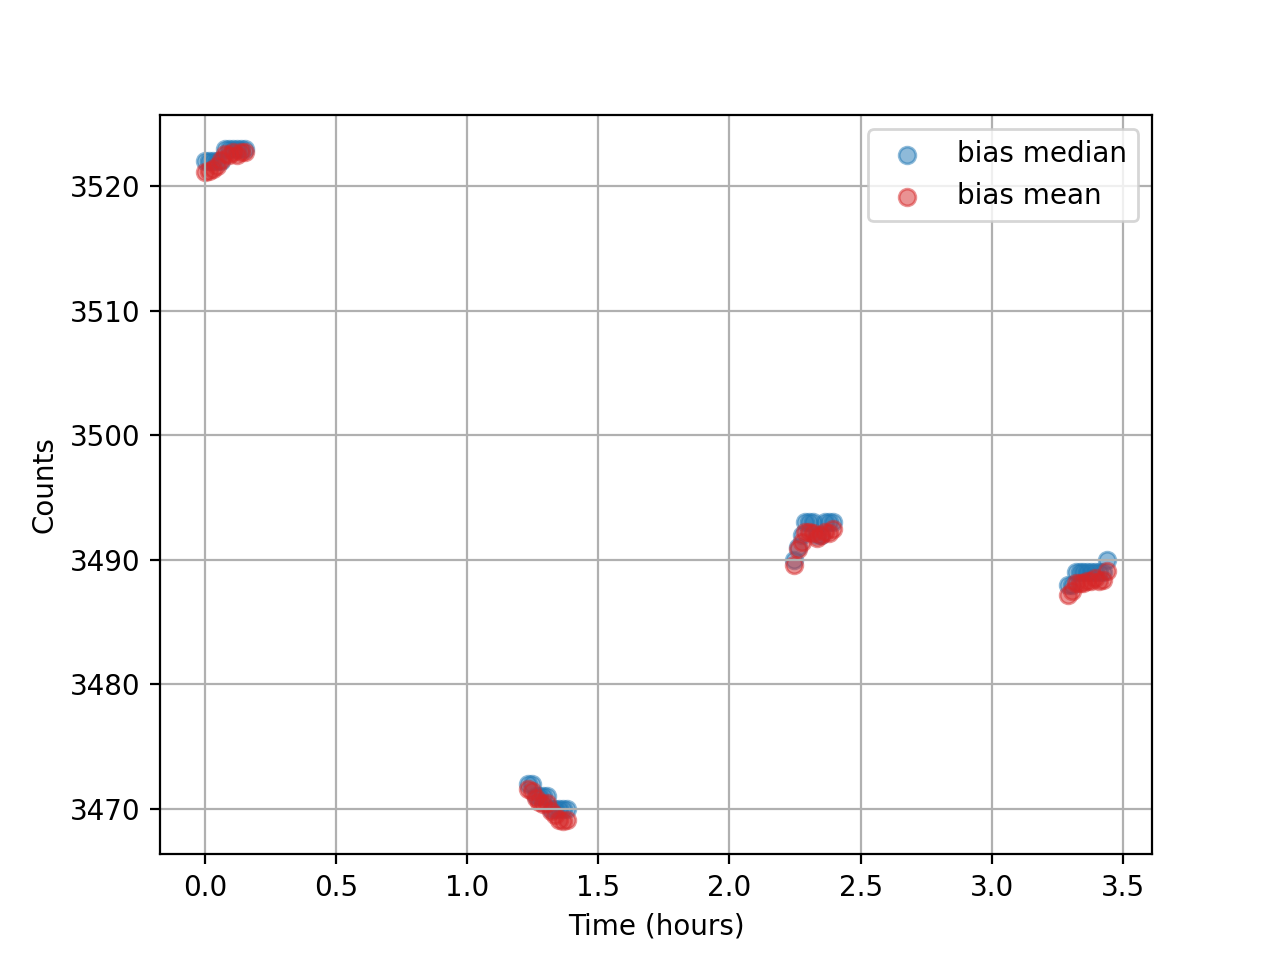

In [69]:
plt.scatter((etime - np.min(etime))*24., b_med, alpha=0.5, label='bias median', c='C0')
plt.scatter((etime - np.min(etime))*24., b_avg, alpha=0.5, label='bias mean', c='C3')

plt.xlabel('Time (hours)')
plt.ylabel('Counts')
plt.legend()
plt.grid()
plt.savefig('bias_count.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

<IPython.core.display.Javascript object>


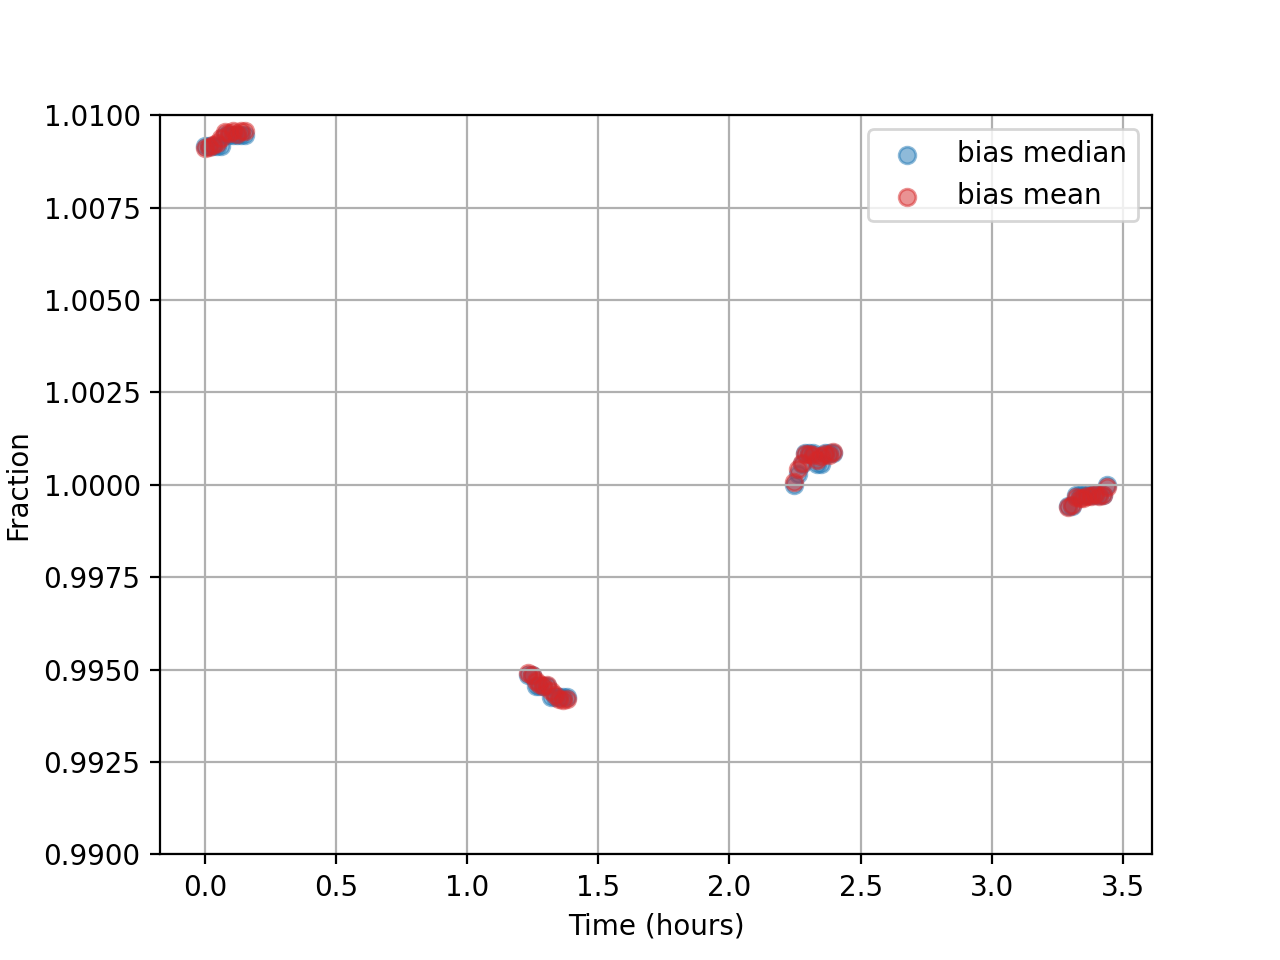

In [70]:
plt.scatter((etime - np.min(etime))*24., b_med/np.median(b_med), alpha=0.5, label='bias median', c='C0')
plt.scatter((etime - np.min(etime))*24., b_avg/np.median(b_avg), alpha=0.5, label='bias mean', c='C3')

plt.xlabel('Time (hours)')
plt.ylabel('Fraction')
plt.legend()
plt.grid()
plt.ylim(.99,1.01)
plt.savefig('bias_frac.png', dpi=150, bbox_inches='tight', pad_inches=0.25)


<IPython.core.display.Javascript object>


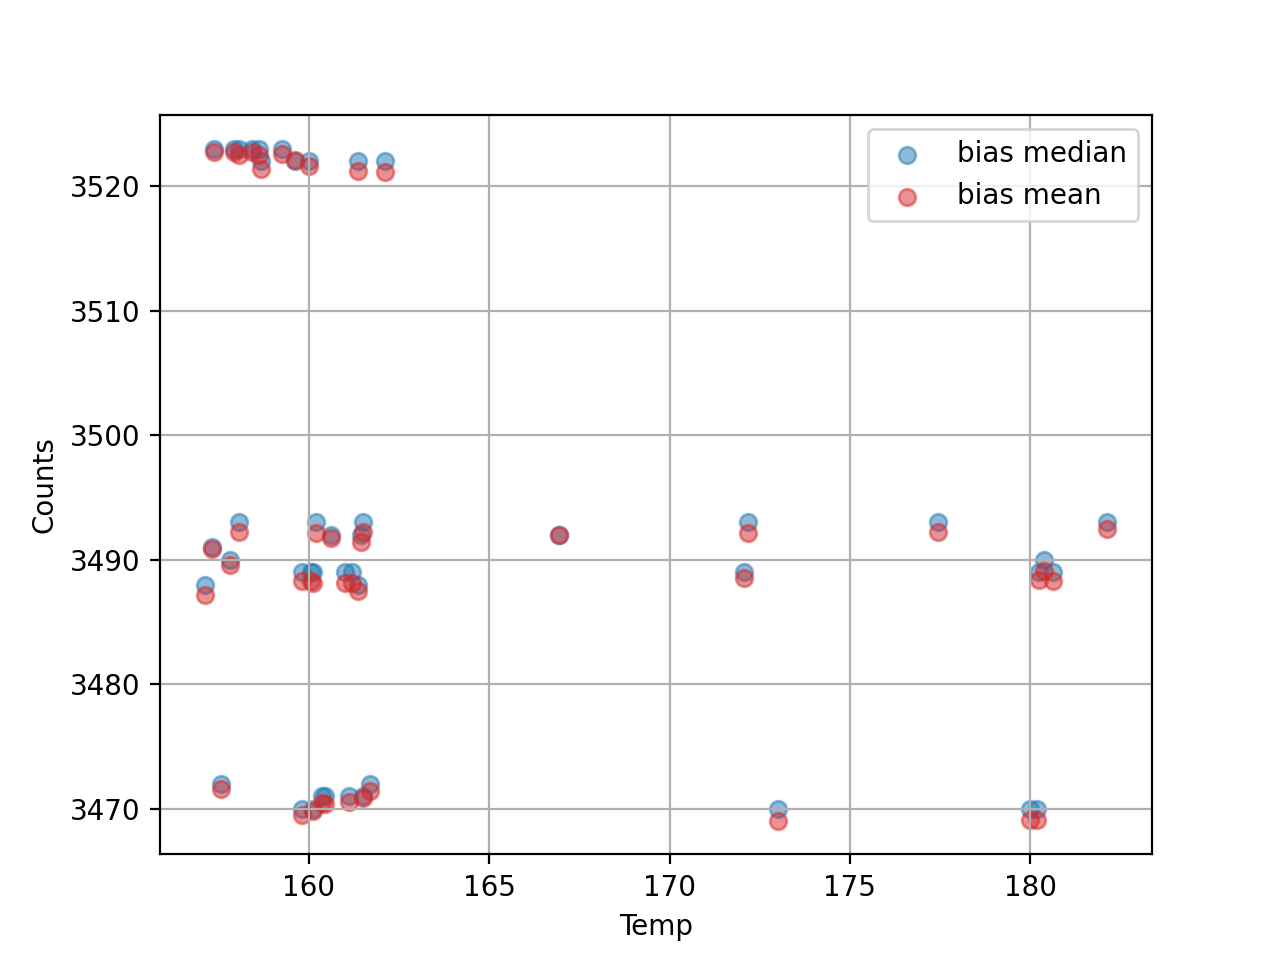

In [41]:
plt.scatter(temp, b_med, alpha=0.5, label='bias median', c='C0')
plt.scatter(temp, b_avg, alpha=0.5, label='bias mean', c='C3')

plt.xlabel('Temp')
plt.ylabel('Counts')
plt.legend()
plt.grid()
# not clearly a temp issue

In [71]:
bdir2 = 'UT211008/'
files2 = glob(bdir2+'bias*.fits')
len(files2)

11

In [72]:
etime2 = np.zeros(len(files2))
b_med2 = np.zeros(len(files2))
b_avg2 = np.zeros(len(files2))
temp2 =  np.zeros(len(files2))

for k in range(len(files2)):
    img2 = CCDData.read(files2[k], unit=u.adu)
    etime2[k] = Time(img2.header['DATE-OBS']).mjd

    b_med2[k] = np.nanmedian(img2.data)
    b_avg2[k] = np.nanmean(img2.data)
    temp2[k] = img2.header['CCDTEMP']


<IPython.core.display.Javascript object>


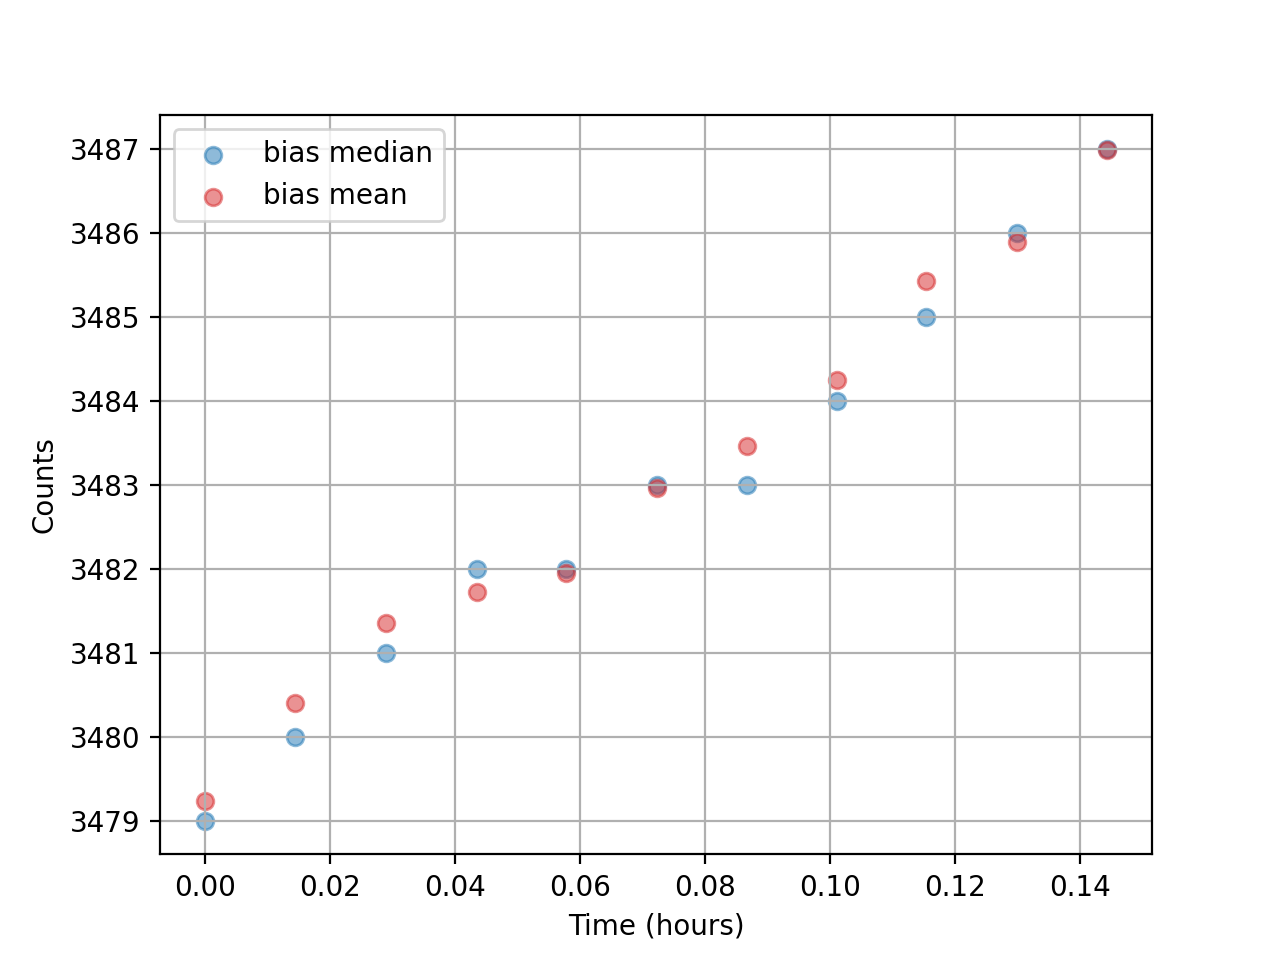

In [64]:
# plt.scatter((etime - np.min(etime))*24., b_med, alpha=0.5, label='bias median', c='C0')
# plt.scatter((etime - np.min(etime))*24., b_avg, alpha=0.5, label='bias mean', c='C3')

plt.scatter((etime2 - np.min(etime2))*24., b_med2, alpha=0.5, label='bias median', c='C0')
plt.scatter((etime2 - np.min(etime2))*24., b_avg2, alpha=0.5, label='bias mean', c='C3')


plt.xlabel('Time (hours)')
plt.ylabel('Counts')
plt.legend()
plt.grid()
# plt.savefig('bias_count.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

<IPython.core.display.Javascript object>


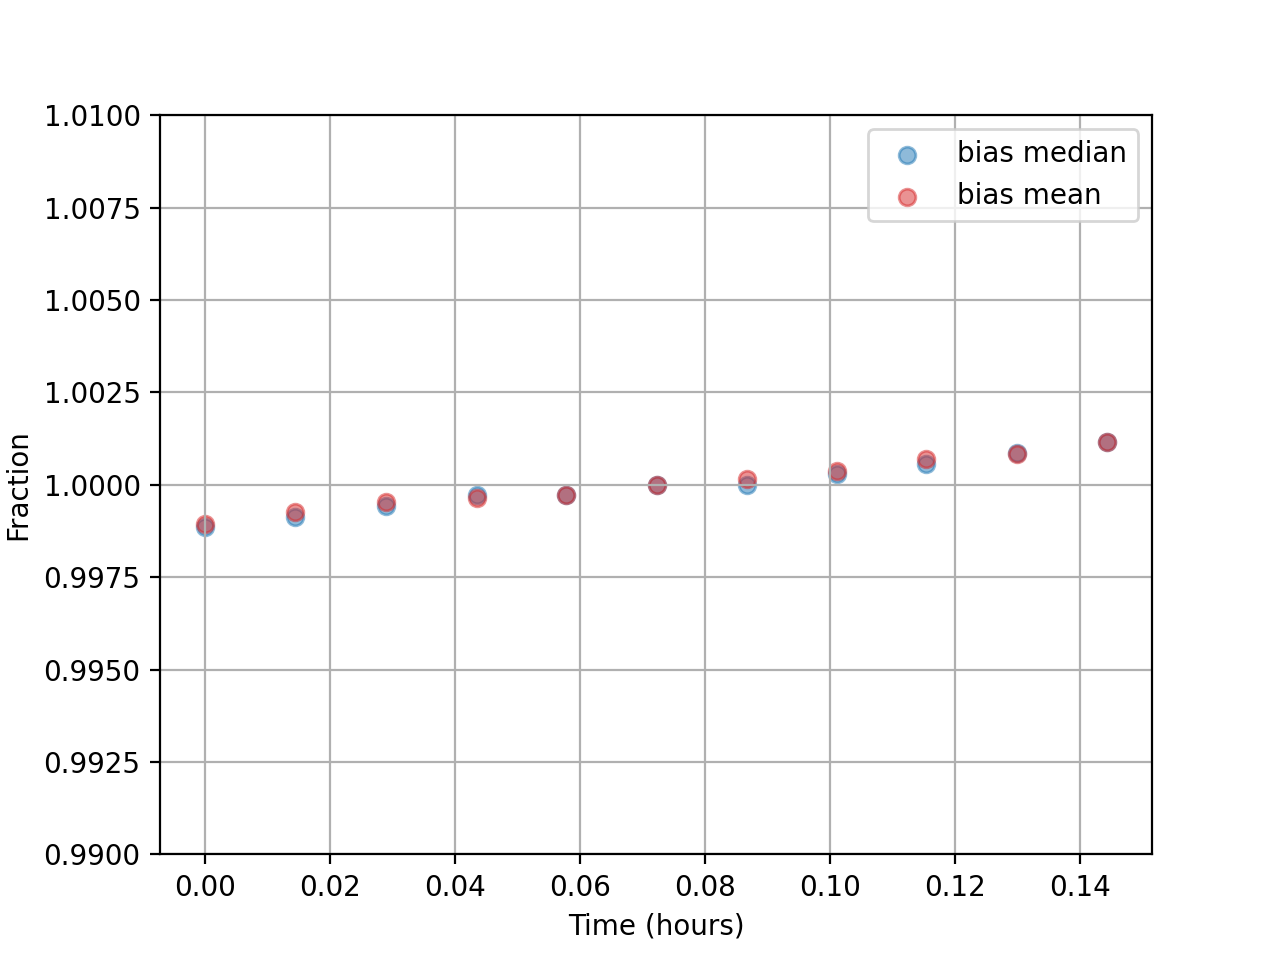

(0.99, 1.01)

In [62]:
plt.scatter((etime2 - np.min(etime2))*24., b_med2/np.median(b_med2), alpha=0.5, label='bias median', c='C0')
plt.scatter((etime2 - np.min(etime2))*24., b_avg2/np.median(b_avg2), alpha=0.5, label='bias mean', c='C3')

plt.xlabel('Time (hours)')
plt.ylabel('Fraction')
plt.legend()
plt.grid()
plt.ylim(.99,1.01)



In [65]:
# lets think about overscan now, since bias is... not great

<IPython.core.display.Javascript object>


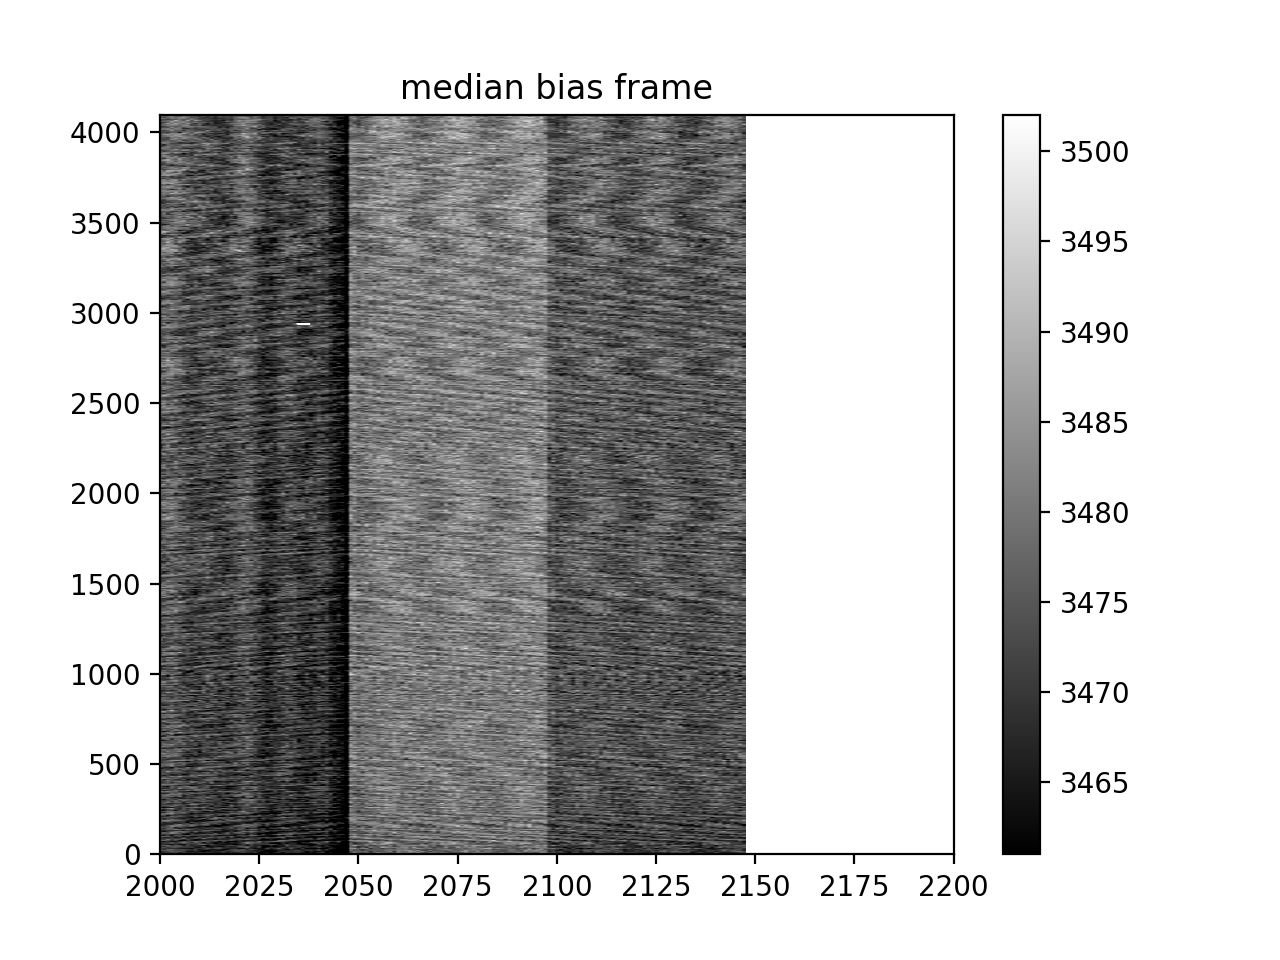

(2000.0, 2200.0)

In [85]:
plt.imshow(img2, origin='lower', aspect='auto', cmap=plt.cm.gray)
plt.title('median bias frame')
plt.clim(np.percentile(img2, (5, 98)))
cb = plt.colorbar()
plt.xlim(2000,2200)

<IPython.core.display.Javascript object>


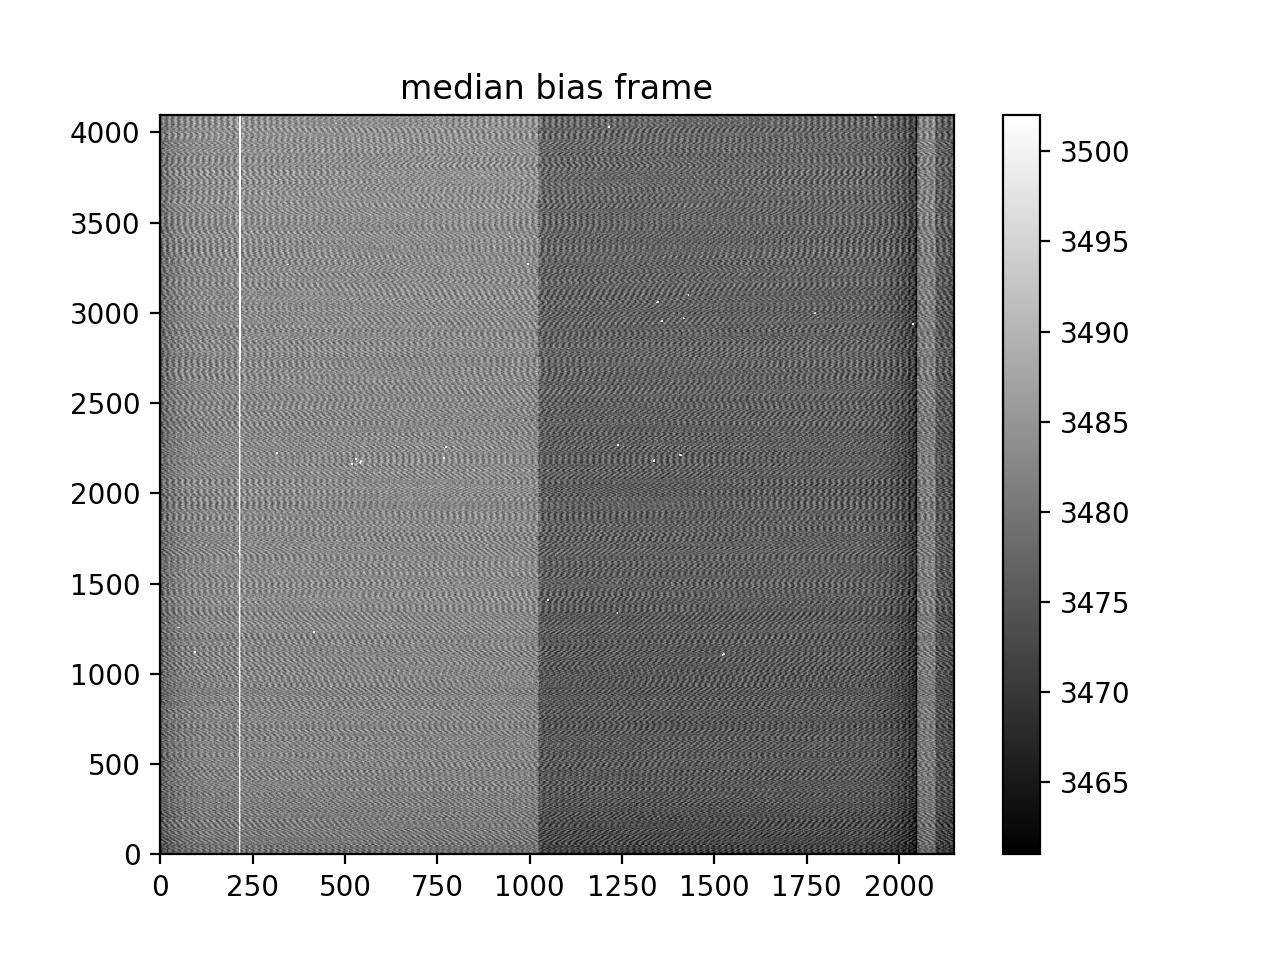

In [89]:
plt.imshow(img2, origin='lower', aspect='auto', cmap=plt.cm.gray)
plt.title('median bias frame')
plt.clim(np.percentile(img2, (5, 98)))
cb = plt.colorbar()
# plt.xlim(2000,2200)

In [90]:
blevel = np.zeros((len(files),4))

for k in range(len(files)):
    img = CCDData.read(files[k], unit=u.adu)
    blevel[k,0] = np.nanmedian(img[:,0:1000])
    blevel[k,1] = np.nanmedian(img[:,1100:2000])
    blevel[k,2] = np.nanmedian(img[:,2050:2090])
    blevel[k,3] = np.nanmedian(img[:,2100:])

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


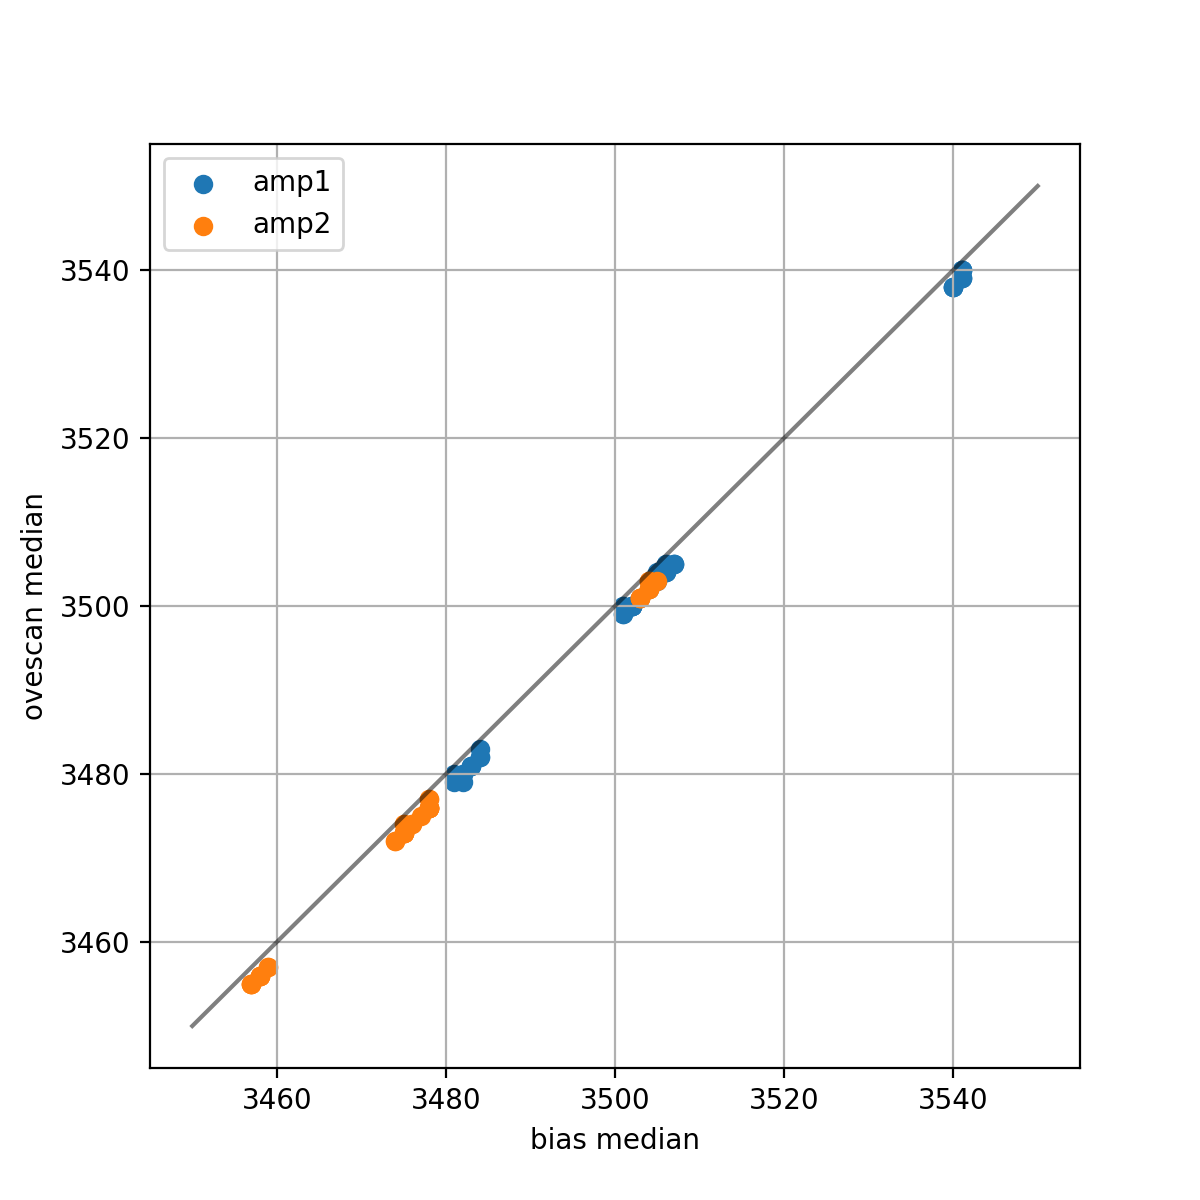

In [104]:
plt.figure(figsize=(6,6))
plt.scatter(blevel[:,0], blevel[:,2], label='amp1')
plt.scatter(blevel[:,1], blevel[:,3], label='amp2')
plt.plot([3450,3550],[3450,3550], c='k', alpha=0.5)
plt.grid()
plt.legend()
plt.xlabel('bias median')
plt.ylabel('ovescan median')
plt.savefig('bias_overscan.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

<IPython.core.display.Javascript object>


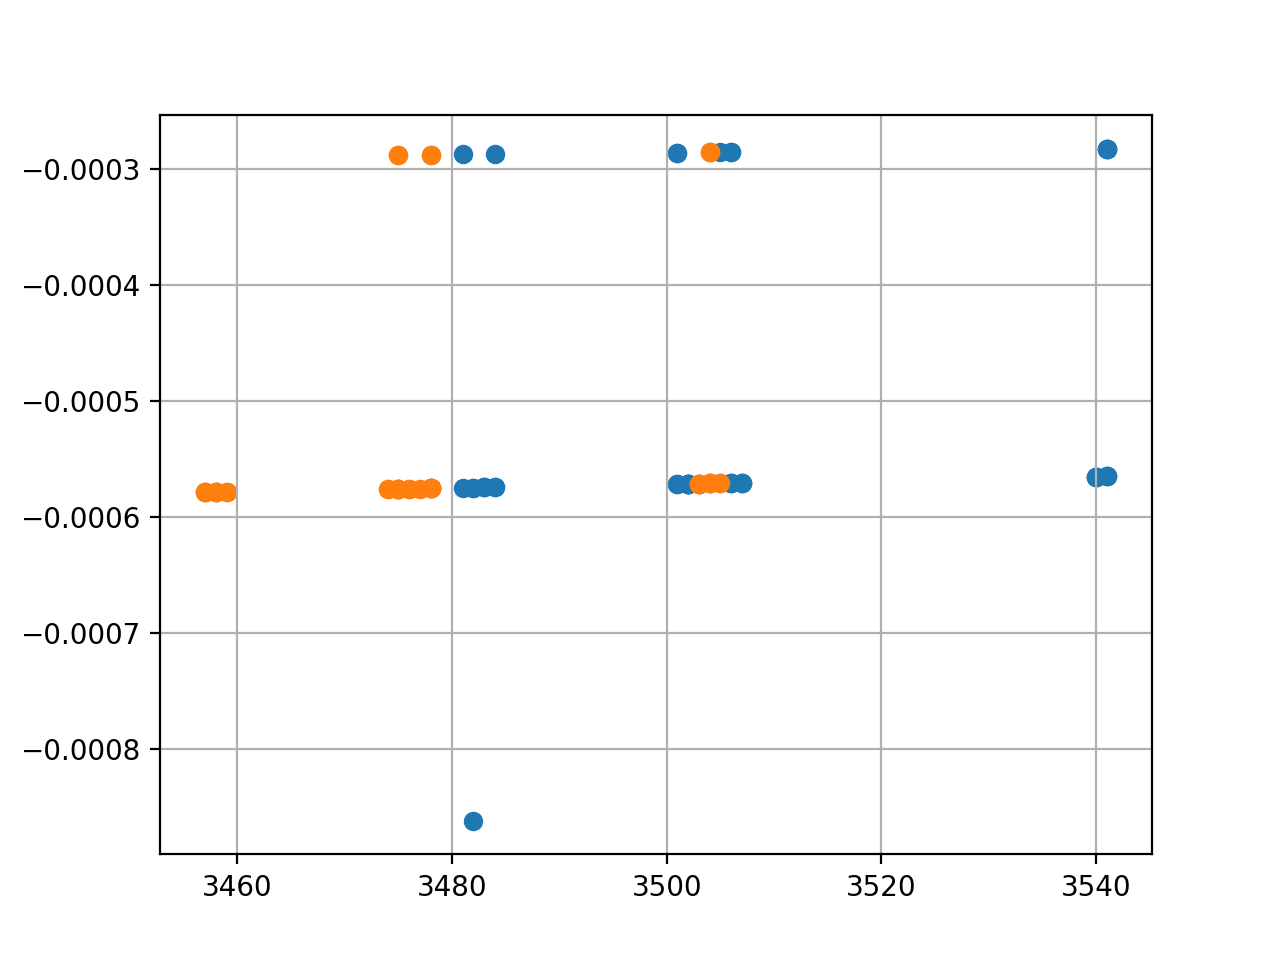

In [100]:
plt.scatter(blevel[:,0], (blevel[:,2]-blevel[:,0])/blevel[:,0])
plt.scatter(blevel[:,1], (blevel[:,3]-blevel[:,1])/blevel[:,1])
plt.grid()